<a href="https://colab.research.google.com/github/elifezgisen/book-recommendation/blob/main/Book_Recommendation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System Model**

### *Developing a recommendation system model for users, using data from book reviews.*




## **Libraries:**

In [196]:
#Import of required libraries.

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import Embedding, Flatten, Input, Dense, Concatenate, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import binary_crossentropy

## **Data Upload:**

In [197]:
#Importing the dataset.

books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')

## **Data Preprocessing:**

In [198]:
books.head(10)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [199]:
ratings.head(10)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5
8,1,3662,4
9,1,3922,5


In [200]:
#Removing unnecessary columns.

books = books[['book_id', 'authors', 'title', 'language_code', 'average_rating', 'ratings_count']]
ratings = ratings[['user_id', 'book_id', 'rating']]

In [201]:
#Creating a dataframe named "df" by merge the Books and Ratings datasets by the column given in the "on" parameter.

df = pd.merge(ratings, books, on='book_id')

In [202]:
df.head(10)

,user_id,book_id,rating,authors,title,language_code,average_rating,ratings_count
0,314,1,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
1,439,1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
2,588,1,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
3,1169,1,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
4,1185,1,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
5,2077,1,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
6,2487,1,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
7,2900,1,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
8,3662,1,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
9,3922,1,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823


In [203]:
df.shape

(85090, 8)

In [204]:
#Checking for null values in the data set.

df.isna().sum()

user_id               0
book_id               0
rating                0
authors               0
title                 0
language_code     11639
average_rating        0
ratings_count         0
dtype: int64

In [205]:
#Null values (NaN values) have been replaced with the most used value in the column.

mostUsedLang = df['language_code'].mode()[0]
df['language_code'].fillna(mostUsedLang, inplace=True)

In [206]:
df.isna().sum()

user_id           0
book_id           0
rating            0
authors           0
title             0
language_code     0
average_rating    0
ratings_count     0
dtype: int64

In [207]:
df.head(5)

,user_id,book_id,rating,authors,title,language_code,average_rating,ratings_count
0,314,1,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
1,439,1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
2,588,1,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
3,1169,1,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823
4,1185,1,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823


In [208]:
#Indexing using user numbers rather than user IDs to represent each user in the dataset.

#For each unique user ID in the 'user_id' column, a user mapping is created corresponding to an 
#integer and with this mapping a new column named 'user' is added. 
#This allows easier processing of user IDs in the data frame in numeric format.

userMapping = {id:i for i, id in enumerate(df['user_id'].unique())}
df['user'] = df['user_id'].apply(lambda x: userMapping[x])

In [209]:
#Rename columns.

df = df.rename(columns={'book_id': 'book', 'rating': 'ratingScore'})

In [210]:
#Converts 'user' and 'book' columns to numeric data and determines unique user and book counts. 
#Data is prepared for the model training process.

userEncoder = LabelEncoder()
df['user'] = userEncoder.fit_transform(df['user_id'].values)
n_users = len(userEncoder.classes_)

bookEncoder = LabelEncoder()
df['book'] = bookEncoder.fit_transform(df['book'].values)
n_books = len(bookEncoder.classes_)

## **Data Visualization:**

In [211]:
list(df.columns)

['user_id',
 'book',
 'ratingScore',
 'authors',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'user']

In [212]:
df.dtypes

user_id             int64
book                int64
ratingScore         int64
authors            object
title              object
language_code      object
average_rating    float64
ratings_count       int64
user                int64
dtype: object

In [213]:
df.describe()

,user_id,book,ratingScore,average_rating,ratings_count,user
count,85090.000000,85090.000000,85090.000000,85090.000000,8.509000e+04,85090.000000
mean,25607.842719,382.383559,3.859043,3.940191,1.487836e+05,14114.780150
std,15126.005504,236.042217,0.986990,0.249151,3.548599e+05,8264.477566
min,2.000000,0.000000,1.000000,2.800000,5.321000e+03,0.000000
25%,12485.250000,158.000000,3.000000,3.780000,1.802400e+04,6912.250000
50%,24994.000000,372.000000,4.000000,3.950000,3.907300e+04,13917.000000
75%,38368.000000,587.000000,5.000000,4.110000,1.171080e+05,21167.000000
max,53424.000000,811.000000,5.000000,4.770000,4.602479e+06,28905.000000


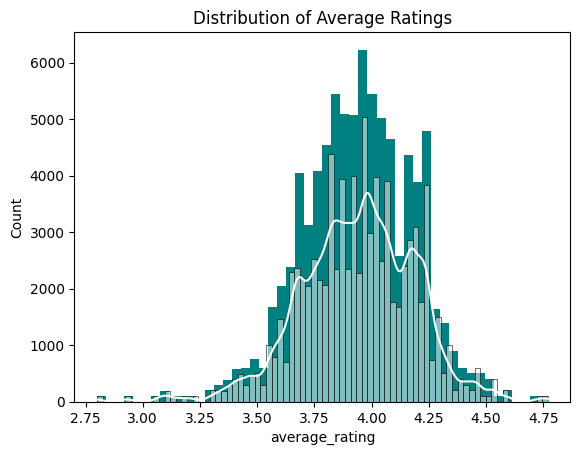

In [214]:
#Visualizing the 'average_rating' column as a histogram.

#Making the histogram more detailed by using more ranges.
plt.hist(df['average_rating'], bins=50, color='#008080')

#Adding an intensity curve to the histogram to make the distribution clearer.
sns.histplot(df['average_rating'], bins=80, kde=True, color='#FFFFFF')

plt.ylabel('Count')
plt.title('Distribution of Average Ratings')
plt.show()

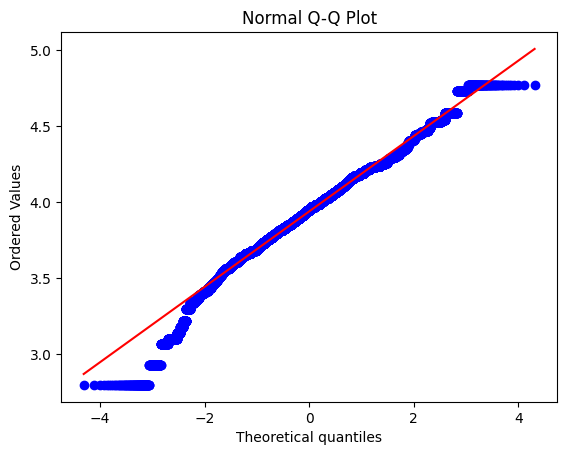

In [215]:
#Adding a QQ Plot plot to check if the data fit the normal distribution.

import scipy.stats as stats

stats.probplot(df['average_rating'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

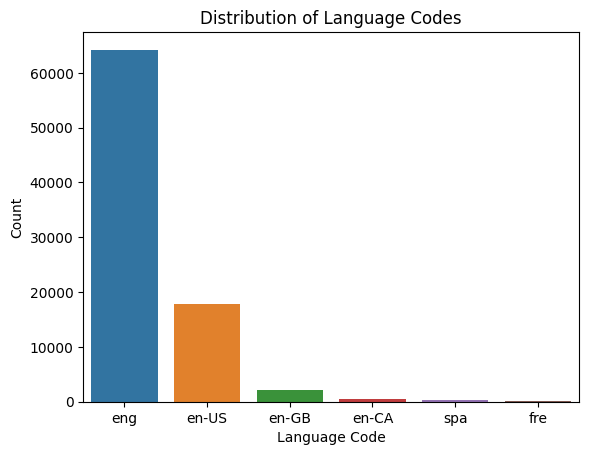

In [216]:
#Visualizing the distribution of categorical values in the 'language_code' column.

sns.countplot(x='language_code', data=df)
plt.xlabel('Language Code')
plt.ylabel('Count')
plt.title('Distribution of Language Codes')
plt.show()

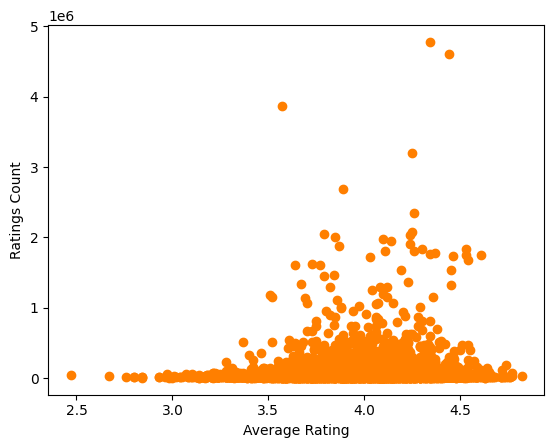

In [217]:
#Show the relationship between the 'average_rating' and 'ratings_count' columns in the Books dataset.

plt.scatter(books['average_rating'], books['ratings_count'], color='#ff7f00')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.show()

## **Model Building:**

In [218]:
#Splitting the dataset into training and test data.

train, test = train_test_split(df, test_size=0.3, random_state=10)

In [219]:
#Using MinMaxScaler to scale data.

scaler = MinMaxScaler()
train[['user', 'book']] = scaler.fit_transform(train[['user', 'book']])
test[['user', 'book']] = scaler.transform(test[['user', 'book']])

***Creates the input layers for the model. Embedding layers are used to create embed matrices corresponding to user and item IDs.***



In [220]:
#The size of the embedding layer.

embedding_dim = 32

In [221]:
#Creating 'user' and 'book' inputs.

user_input = Input(shape=(1,))
book_input = Input(shape=(1,))

In [222]:
#Creating 'user' and 'book' embedding layers.

userEmbedding = Embedding(input_dim=len(userMapping), output_dim=embedding_dim, input_length=1)(user_input)
bookEmbedding = Embedding(input_dim=len(df['book'].unique()), output_dim=embedding_dim, input_length=1)(book_input)

In [223]:
#BatchNormalization.

userEmbedding = BatchNormalization()(userEmbedding)
bookEmbedding = BatchNormalization()(bookEmbedding)

In [224]:
#Flatten embedding layers.

userFlattened = Flatten()(userEmbedding)
bookFlattened = Flatten()(bookEmbedding)

In [225]:
#Merge 'user' and 'book' embedding layers.

mergedLayers = Concatenate()([userFlattened, bookFlattened])

In [226]:
#Creating attributes of 'user' and 'book' inputs and specifying target outputs. 
#A one-dimensional input is used and the properties of the inputs are created with Embedding. 
#Finally, normalization is done with BatchNormalization.

user_input = Input(shape=(1,))
user_emb = Flatten()(Embedding(n_users, 50)(user_input))
user_emb = BatchNormalization()(user_emb)

book_input = Input(shape=(1,))
book_emb = Flatten()(Embedding(n_books, 50)(book_input))
book_emb = BatchNormalization()(book_emb)

In [227]:
#MLP model.

mlp_concat = Concatenate()([user_emb, book_emb])
mlp_dropout_1 = tf.keras.layers.Dropout(0.5)(mlp_concat)
mlp_layer_1 = Dense(64, activation='relu')(mlp_dropout_1)
mlp_layer_1 = BatchNormalization()(mlp_layer_1)
mlp_dropout_2 = tf.keras.layers.Dropout(0.5)(mlp_layer_1)
mlp_layer_2 = Dense(32, activation='relu')(mlp_dropout_2)
mlp_layer_2 = BatchNormalization()(mlp_layer_2)
mlp_dropout_3 = tf.keras.layers.Dropout(0.5)(mlp_layer_2)
mlp_layer_3 = Dense(16, activation='relu')(mlp_dropout_3)
mlp_layer_3 = BatchNormalization()(mlp_layer_3)
mlp_dropout_4 = tf.keras.layers.Dropout(0.5)(mlp_layer_3)
mlp_layer_4 = Dense(8, activation='relu')(mlp_dropout_4)
mlp_layer_4 = BatchNormalization()(mlp_layer_4)

In [228]:
#FM model.

fm_concat = Concatenate()([user_emb, book_emb])
fm_layer = tf.keras.layers.Dot(axes=1)([user_emb, book_emb])
fm_layer = BatchNormalization()(fm_layer)

In [229]:
#FINT model.

fint_concat = Concatenate()([user_emb, book_emb])
fint_layer_1 = Dense(64, activation='relu')(fint_concat)
fint_layer_1 = BatchNormalization()(fint_layer_1)
fint_dropout_1 = tf.keras.layers.Dropout(0.5)(fint_layer_1)
fint_layer_2 = Dense(32, activation='relu')(fint_dropout_1)
fint_layer_2 = BatchNormalization()(fint_layer_2)
fint_dropout_2 = tf.keras.layers.Dropout(0.5)(fint_layer_2)
fint_layer_3 = Dense(16, activation='relu')(fint_dropout_2)
fint_layer_3 = BatchNormalization()(fint_layer_3)
fint_dropout_3 = tf.keras.layers.Dropout(0.5)(fint_layer_3)
fint_layer_4 = Dense(8, activation='relu')(fint_dropout_3)
fint_layer_4 = BatchNormalization()(fint_layer_4)

In [230]:
#Building a combined model.

concat_all = Concatenate()([mlp_layer_4, fm_layer, fint_layer_4])
final_layer_1 = Dense(8, activation='relu')(concat_all)
final_layer_2 = Dense(4, activation='relu')(final_layer_1)
output_layer = Dense(1, activation='relu')(final_layer_2)

***The model is compiled using the 'Adam optimizer' and the 'mse' loss function.***


In [231]:
#Compilation of the model.

model = Model(inputs=[user_input, book_input], outputs=output_layer)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

In [232]:
#Print the model summary.

print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_24 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_22 (Embedding)       (None, 1, 50)        1445300     ['input_23[0][0]']               
                                                                                                  
 embedding_23 (Embedding)       (None, 1, 50)        40600       ['input_24[0][0]']               
                                                                                            

***The model is trained, model predictions are made, and results are calculated. Using the RMSE metric, the performance of the model is measured and printed on the screen.***

In [233]:
#Training the model.

early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min')

model.fit(x=[train['user'], train['book']], y=train['ratingScore'], batch_size=64, epochs=10, validation_data=([test['user'], test['book']], test['ratingScore']), callbacks=[early_stopping])

Epoch 1/10
931/931 [==============================] - 17s 15ms/step - loss: 2.8126 - val_loss: 124.0215
Epoch 2/10
931/931 [==============================] - 13s 14ms/step - loss: 1.0598 - val_loss: 1.0512
Epoch 3/10
931/931 [==============================] - 13s 14ms/step - loss: 1.0046 - val_loss: 2.1343
Epoch 4/10
931/931 [==============================] - 13s 14ms/step - loss: 0.9928 - val_loss: 5.8852
Epoch 5/10
931/931 [==============================] - 13s 14ms/step - loss: 0.9863 - val_loss: 2.4931


## **Test and Model Performance:**

In [234]:
testPredictions = model.predict([test['user'], test['book']])
testPredictions = np.round(testPredictions)

testRMSE = np.sqrt(mean_squared_error(test['ratingScore'], testPredictions))

print('RMSE:', testRMSE)

798/798 [==============================] - 1s 1ms/step
RMSE: 1.537379799357109
